In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [4]:
# Load dataset
df = pd.read_csv('breast-cancer.csv')
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [5]:
df.shape

(569, 11)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


In [7]:
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave_points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
 10  diagnosis               569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [9]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'],
      dtype='object')

In [10]:
df.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
diagnosis                 0
dtype: int64

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'diagnosis'}>, <Axes: >]], dtype=object)

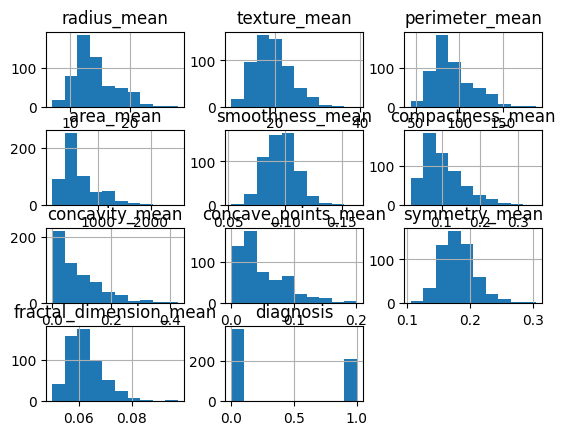

In [11]:
df.hist()

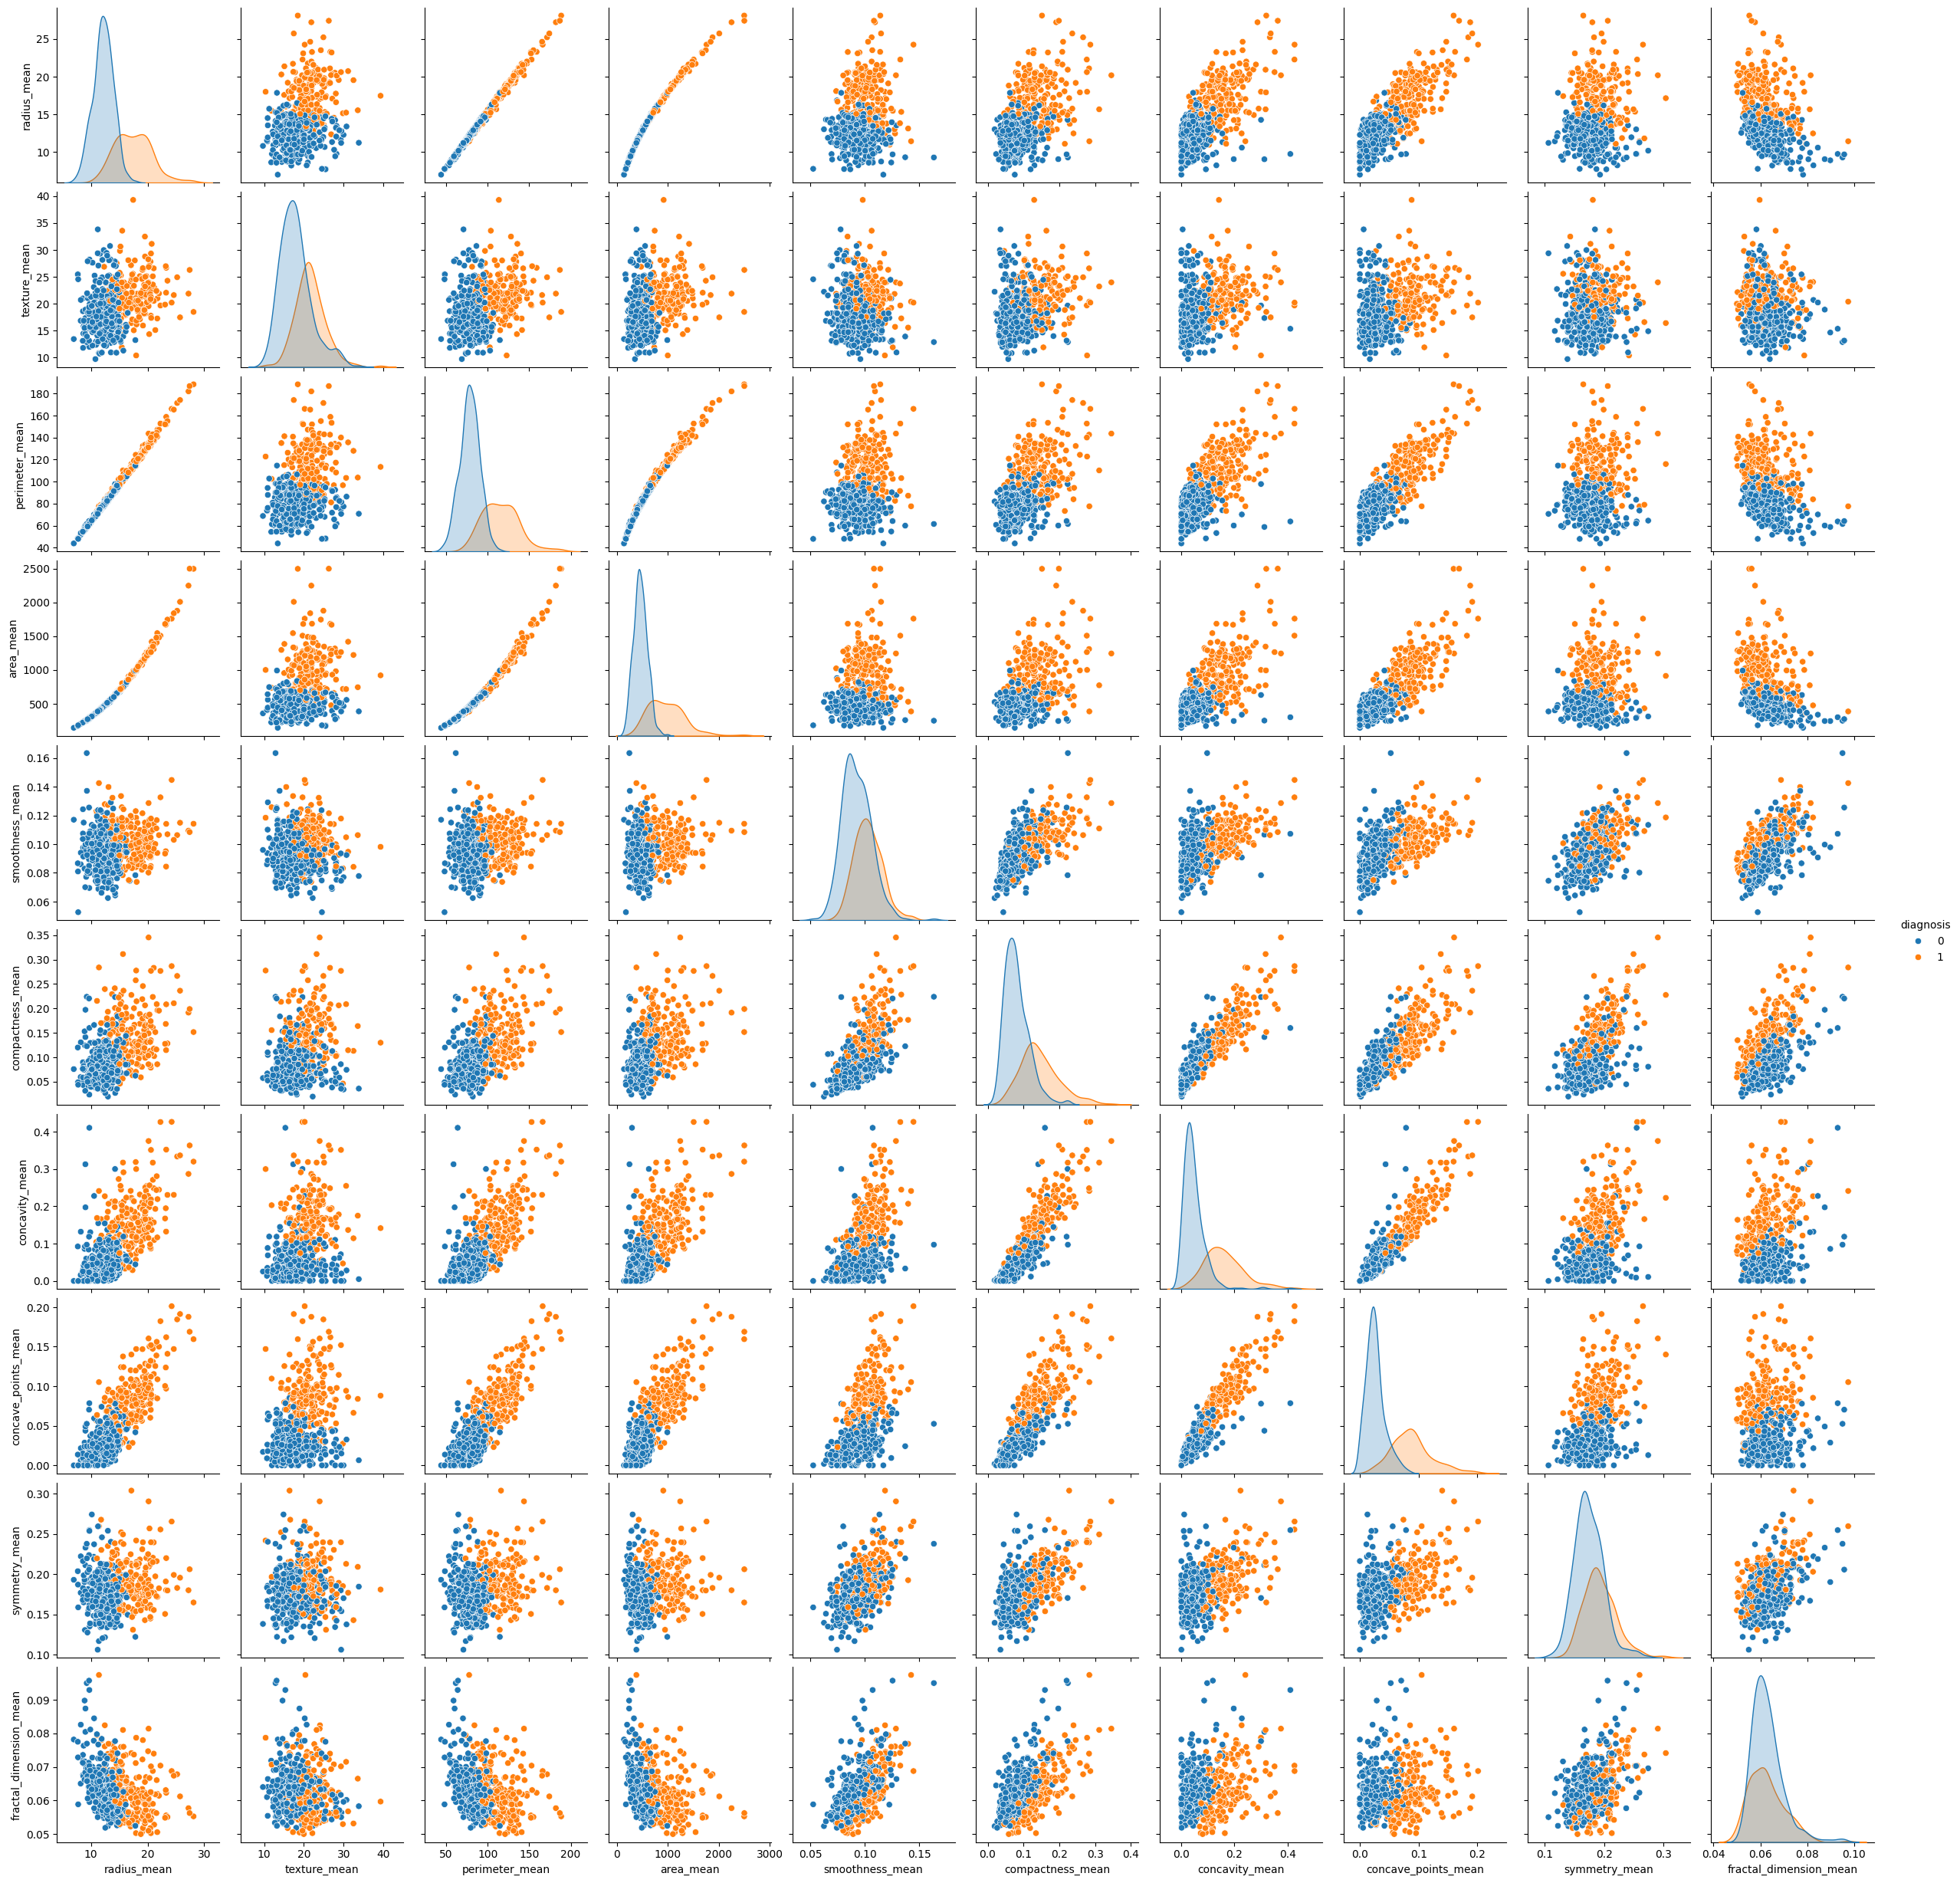

In [12]:
sns.pairplot(df, hue='diagnosis')

<Axes: >

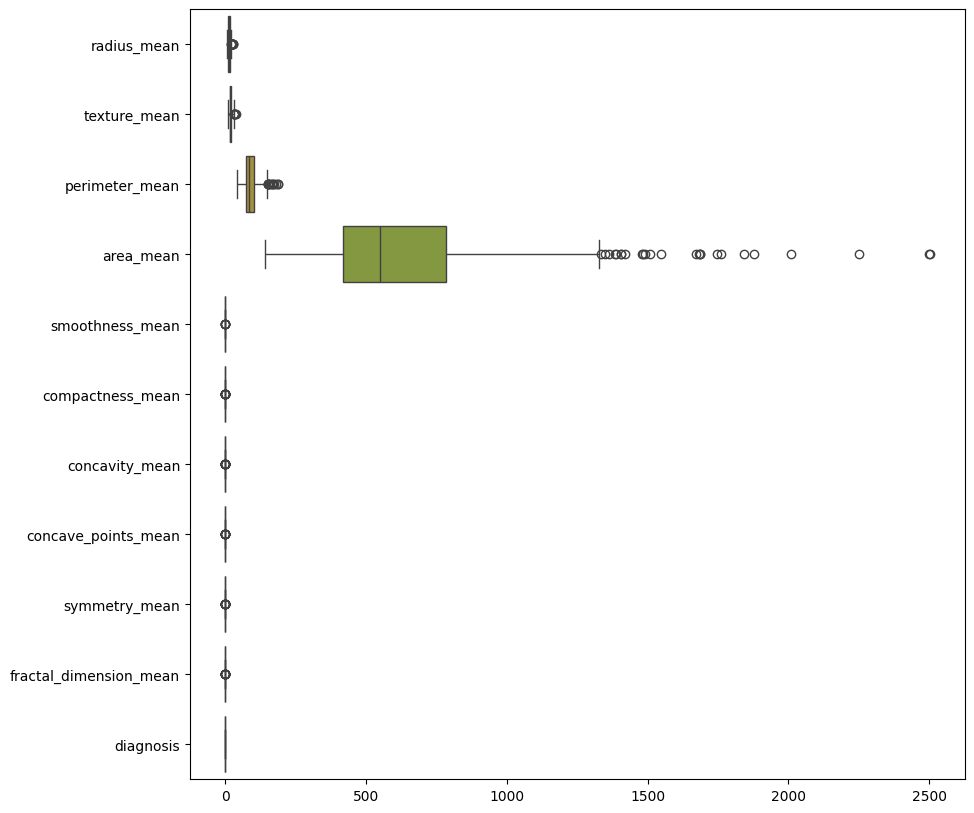

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

In [14]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


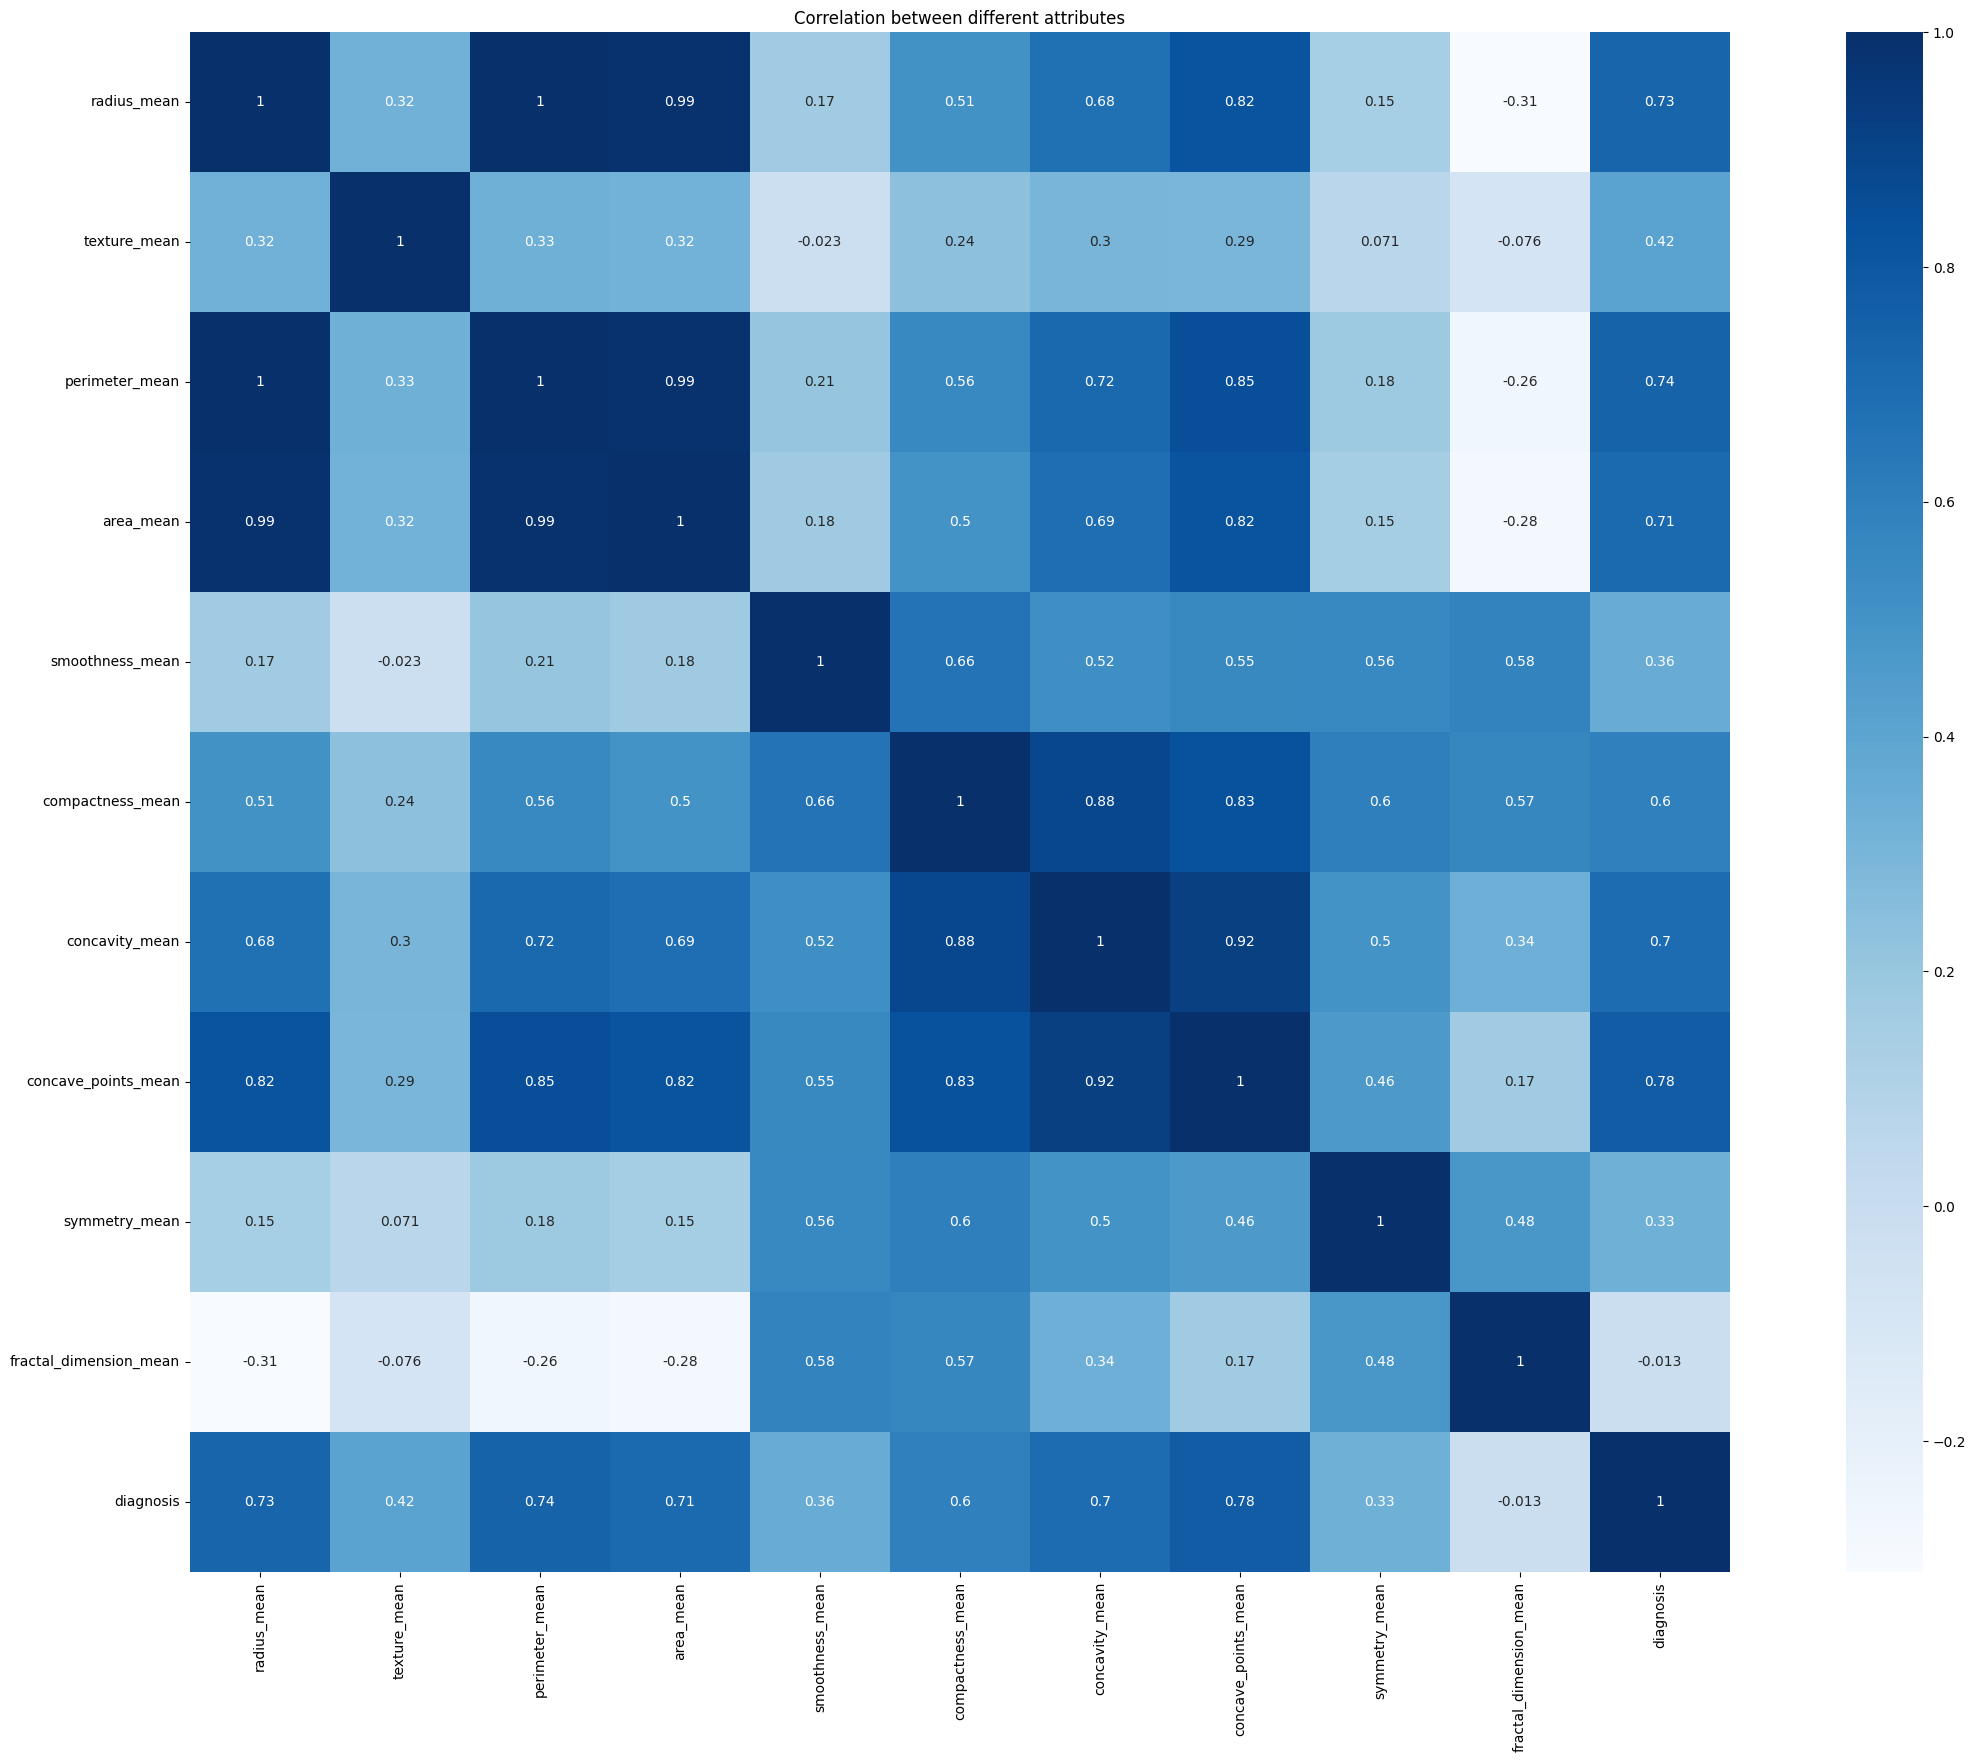

In [15]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()


In [16]:
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

radius_mean               0.730029
texture_mean              0.415185
perimeter_mean            0.742636
area_mean                 0.708984
smoothness_mean           0.358560
compactness_mean          0.596534
concavity_mean            0.696360
concave_points_mean       0.776614
symmetry_mean             0.330499
fractal_dimension_mean    0.012838
diagnosis                 1.000000
Name: diagnosis, dtype: float64

In [17]:
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [18]:
scoring = 'accuracy'

In [19]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.894615 (Std accuracy is 0.028879)
For SVM Model:Mean accuracy is 0.887115 (Std accuracy is 0.070028)
For NB Model:Mean accuracy is 0.917179 (Std accuracy is 0.046048)
For KNN Model:Mean accuracy is 0.881987 (Std accuracy is 0.051194)


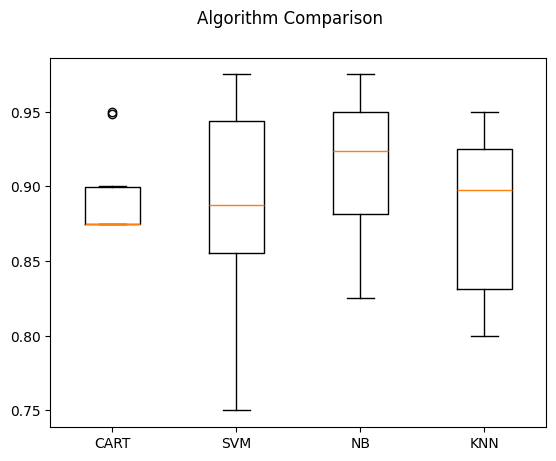

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    


Model: CART
Accuracy score: 0.8947368421052632
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       107
           1       0.88      0.83      0.85        64

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171


Model: SVM
Accuracy score: 0.8771929824561403
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       107
           1       0.89      0.77      0.82        64

    accuracy                           0.88       171
   macro avg       0.88      0.85      0.86       171
weighted avg       0.88      0.88      0.88       171


Model: NB
Accuracy score: 0.9005847953216374
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       107
           1       0.87 

In [22]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test, predictions))

Accuracy score: 0.8947368421052632


Text(50.722222222222214, 0.5, 'True')

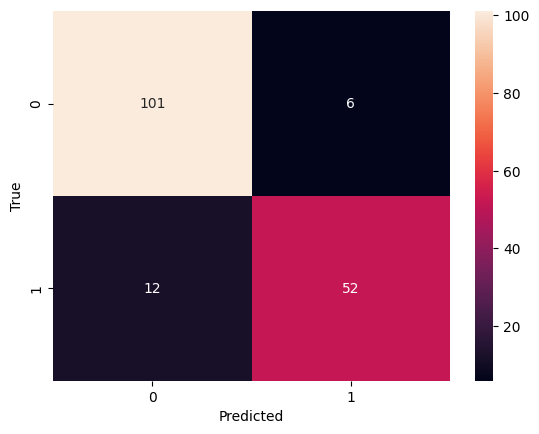

In [23]:

cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')



In [24]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions2 = svm.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test, predictions2))

Accuracy score: 0.8771929824561403


Text(0.5, 23.52222222222222, 'Predicted')

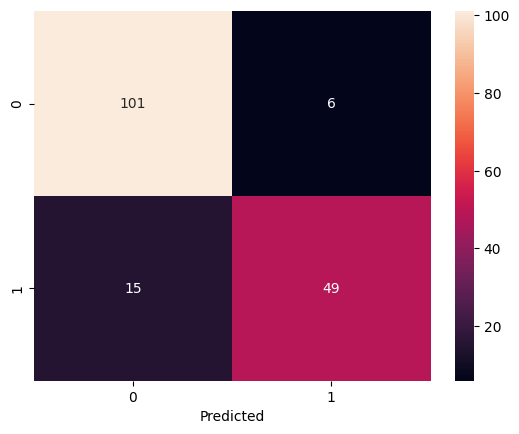

In [25]:
cm = confusion_matrix(Y_test, predictions2)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')

In [26]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions3 = nb.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test, predictions3))

Accuracy score: 0.9005847953216374


Text(0.5, 23.52222222222222, 'Predicted')

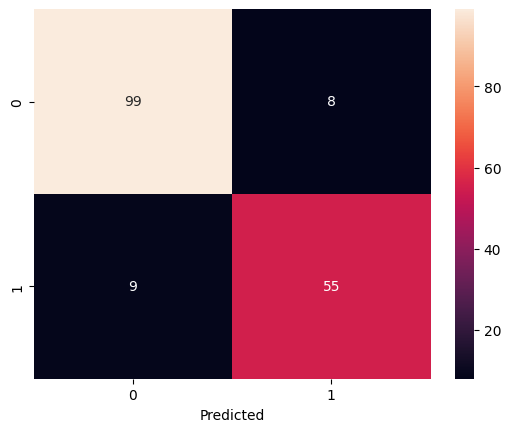

In [27]:
cm = confusion_matrix(Y_test, predictions3)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions4 = knn.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test, predictions4))

Accuracy score: 0.8654970760233918


Text(0.5, 23.52222222222222, 'Predicted')

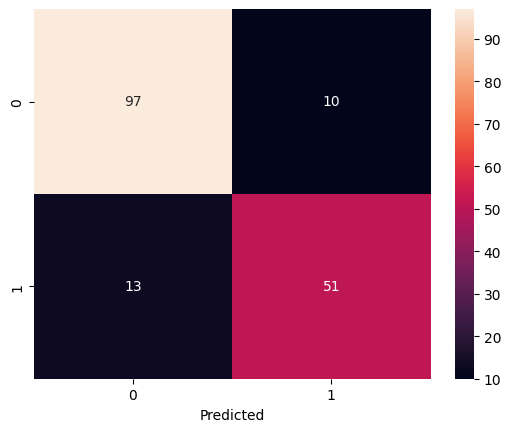

In [29]:
cm = confusion_matrix(Y_test, predictions4)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')